In [2]:
import tensorflow as tf
import zipfile
import os 
import random
import csv
import math
import shutil
from shutil import copyfile
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array, load_img

In [2]:
#extracting data from zip
try:
    local_zip = './data/archive.zip'
    zip_ref = zipfile.ZipFile(local_zip, 'r')
    zip_ref.extractall('./data')
    zip_ref.close()
#if data is already extracted it will instead print file already extracted
except:
    print('file already extracted')

file already extracted


In [3]:
tumor=[]
for j in range (1,8):
    data=[]
    img=[]
    with open('./data/GroundTruth.csv') as f:
        reader = csv.reader(f, delimiter=',')
        next(reader)
        for row in reader:
            img.append(row[0] + '.jpg')
            data.append(math.ceil(float(row[j])))
        tumor.append(data)
print(f"there is {len(data)} data")
print(len(tumor))

there is 10015 data
7


In [7]:
root_dir = "./data/cancerimages/"
dir = ['melanoma', 'melanocytic_nevi', 'basal_cell_carcinoma', 'bowen_disease', 'benign_keratosis', 'dermatofibroma', 'vascular_lesions']

def create_dir(root_path):
    if os.path.exists(root_dir):
        shutil.rmtree(root_dir)
    else:
        os.makedirs(os.path.join(root_path, 'training'))
        os.makedirs(os.path.join(root_path, 'validation'))

        for i in dir:
            os.makedirs(os.path.join(f'{root_path}/training', i))
            os.makedirs(os.path.join(f'{root_path}/validation', i))
            
create_dir(root_path=root_dir)

In [8]:
counter = 0
for i in range (len(tumor)):
    labels = []
    for j in range (len(tumor[i])):
        if tumor[i][j] == 1:
            labels.append(img[j])
    print(f"Tumor {dir[counter]} have {len(labels)} data")
    split = round(len(labels) * 0.8)

    training = labels[:split]
    val = labels[split:]
    print(f"Training data is {len(training)}")
    print(f"Validation data is {len(val)}\n")
    
    root = './data/images/'
    root_dest = './data/cancerimages'
    for i in training:
        source_img = os.path.join(root, i)
        destination = os.path.join(f"{root_dest}/training/{dir[counter]}", i)
        copyfile(source_img, destination)
    
    for i in val:
        source_img = os.path.join(root, i)
        destination = os.path.join(f"{root_dest}/validation/{dir[counter]}", i)
        copyfile(source_img, destination)
        
    counter+=1

Tumor melanoma have 1113 data
Training data is 890
Validation data is 223

Tumor melanocytic_nevi have 6705 data
Training data is 5364
Validation data is 1341

Tumor basal_cell_carcinoma have 514 data
Training data is 411
Validation data is 103

Tumor bowen_disease have 327 data
Training data is 262
Validation data is 65

Tumor benign_keratosis have 1099 data
Training data is 879
Validation data is 220

Tumor dermatofibroma have 115 data
Training data is 92
Validation data is 23

Tumor vascular_lesions have 142 data
Training data is 114
Validation data is 28



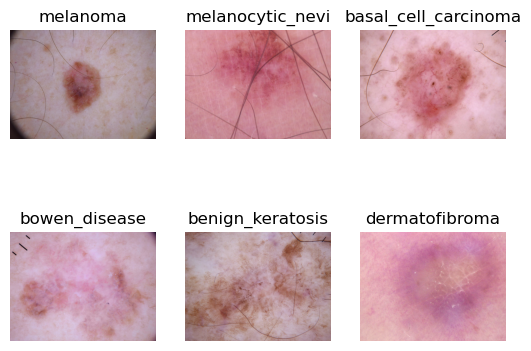

In [24]:
#show image example
root_path = root_dir + 'training/'
fig, axes = plt.subplots(2, 3)
counter = 0
for i in range(2):
    for j in range(3):
        ax = axes[i][j]
        ax.set_title(dir[counter])
        ax.imshow(load_img(f"{os.path.join(f'{root_path}/{dir[counter]}', os.listdir(f'{root_path+dir[counter]}')[random.randint(0,100)])}"))
        ax.set_axis_off()
        plt.show
        counter += 1